# Lending Club Default Analysis

In [52]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)   #look at all the columns
sns.set(style="ticks", color_codes=True)


In [53]:

#Visually better graphs
from matplotlib import rcParams
import matplotlib as mpl

blue = '#3498DB'
gray = '#95A5A6'
red = '#E74C3C'
dark_gray = '#34495E'
green = '#2ECC71'
purple = '#9B59B6'
flatui = [blue, gray, red, dark_gray, green, purple]

# Patches
mpl.rc('patch', 
       linewidth=0.5, 
       facecolor=dark_gray, 
       edgecolor='w', 
       force_edgecolor=True, 
       antialiased=True)    
  
# Figure
mpl.rc('figure', 
       figsize= (10, 6),
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)

# Grid
mpl.rc('grid', 
       color=dark_gray,
       alpha=0.5, 
       linewidth=0.5, 
       linestyle='-')

# Axes
mpl.rc('axes', 
       facecolor='w',
       edgecolor=dark_gray,
       linewidth=0.5,
       grid=True,
       titlesize='large',
       labelsize='large',
       labelcolor=dark_gray,
       axisbelow=True)

mpl.rc('axes.spines',
       right=False,
       top=False)

# Ticks
mpl.rc('xtick', 
       direction='out',
       color=dark_gray)

mpl.rc('xtick.major', 
       size=0.0)

mpl.rc('xtick.minor', 
       size=0.0)

mpl.rc('ytick', 
       direction='out',
       color=dark_gray)

mpl.rc('ytick.major', 
       size=0.0)

mpl.rc('ytick.minor', 
       size=0.0)

mpl.rc('legend', 
       frameon=False,
       numpoints=1,
       scatterpoints=1)

mpl.rc('font', 
       size=13,
       weight=400,
       family='sans-serif')

rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


In [54]:
#Read in the file
df = pd.read_csv('loan.csv', low_memory=False)

## Data Exploration

In [55]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.info()

#887379 instances with 74 features in the initial dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [57]:
print((df['inq_fi'].count()/887379)*100)
print((df['dti_joint'].count()/887379)*100)

#only 2.4% of data in columns inq_fi, total_cu_tl,inq_last_12m etc
#0.05% of data in dti joinm annual_inc_joint etc
#need to remove such features

2.4084410381584416
0.05735993301621968


### Dropping the Columns with no value

In [58]:

drop_columns= ['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util',
              'total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m',
              'verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog',
              'mths_since_last_record','desc','mths_since_last_delinq','next_pymnt_d','earliest_cr_line','out_prncp']
df = df.drop(drop_columns, axis=1)              

#features that will be troublesome and cause overfitting because they are unique:id,url,zip_code

bad_features = ['id','url','zip_code','member_id']

df=df.drop(bad_features,axis=1)

              
              

In [59]:
len(df.columns) #50 columns now

46

In [60]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [61]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [62]:
df.isnull().any()

loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                      True
emp_length                     True
home_ownership                False
annual_inc                     True
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
purpose                       False
title                          True
addr_state                    False
dti                           False
delinq_2yrs                    True
inq_last_6mths                 True
open_acc                       True
pub_rec                        True
revol_bal                     False
revol_util                     True
total_acc                      True
initial_list_status         

In [63]:
len(df.emp_title.unique())

#133,191 unique employee titles, thus we can remove as a database of 250,000 it will provide no info and lead to overfitting

299272

In [64]:
df = df.drop('emp_title',axis=1)

In [65]:
df.pymnt_plan.value_counts()

#again no need to keep this feature as it adds no value our model

n    887369
y        10
Name: pymnt_plan, dtype: int64

In [66]:
df = df.drop('pymnt_plan',axis=1)

### Visual EDA

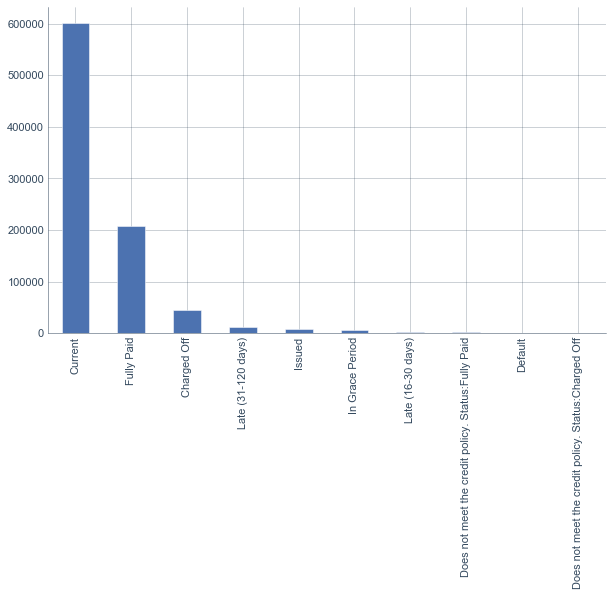

In [67]:
df['loan_status'].value_counts().plot(kind='bar')

#interesting, since our goal is to figure out whether a new borrower will default or not we have to compare
#our target variable is loan status with a binary value:default or no default
#fully paid off vs (charged off & defaulted)
#The current loan status are still ongoing and we don't know the end result

#Loans that are in "Default" are loans for which borrowers have failed 
#to make payments for an extended period of time.

#Charge Off typically occurs when a loan is 120 days or more past due and 
#there is no reasonable expectation of sufficient payment to prevent the charge off.

In [68]:
#drop categories not needed in loan status

cat_drop= ['Current','Late','Issued','In Grace Period','Late(16-30 days)','Does not meet the credit policy. Status:Charged Off','Does not meet the credit policy. Status:Fully Paid']
df = df.loc[~((df['loan_status']=='Current') | (df['loan_status']=='Late') | (df['loan_status']=='In Grace Period')| (df['loan_status']=='Late(16-30 days)') |(df['loan_status']=='Does not meet the credit policy. Status:Charged Off') |(df['loan_status']=='Does not meet the credit policy. Status:Fully Paid') | (df['loan_status']=='Late (31-120 days)') | (df['loan_status']=='Issued') | (df['loan_status']=='Late (16-30 days)') ),:]



In [69]:
#make charged off to default
df['loan_status'] = df['loan_status'].replace({'Charged Off':'Default'}) #add in Data wrangling


In [70]:
#check to see our modificiation is working
df['loan_status'].value_counts()

Fully Paid    207723
Default        46467
Name: loan_status, dtype: int64

In [71]:
loan_status_count = df['loan_status'].value_counts()
fullypaid_count=loan_status_count[0]
default_count=loan_status_count[1]
default_rate = default_count/fullypaid_count
print('The default ratio in our dataset of fully paid vs defaulted is %f' %(default_rate*100))

The default ratio in our dataset of fully paid vs defaulted is 22.369694


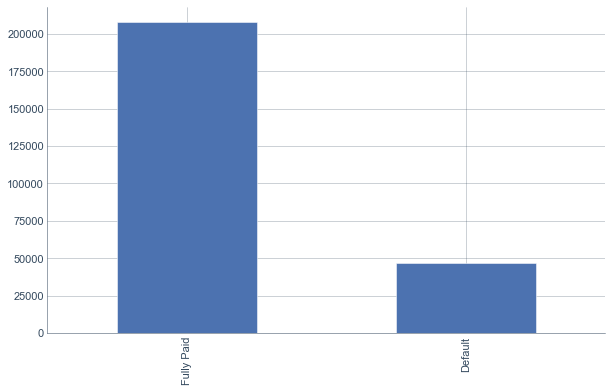

In [72]:
df.loan_status.value_counts().plot(kind='bar')

#slightly imbalanced dataset

In [73]:
df_default=df[df['loan_status'] == 'Default']
df_fullypaid = df[df['loan_status'] == 'Fully Paid']

#seperate the defaulted and fully paid for analysis and EDA

Text(0.5, 1.0, 'Grades of Loans of Fully Paid')

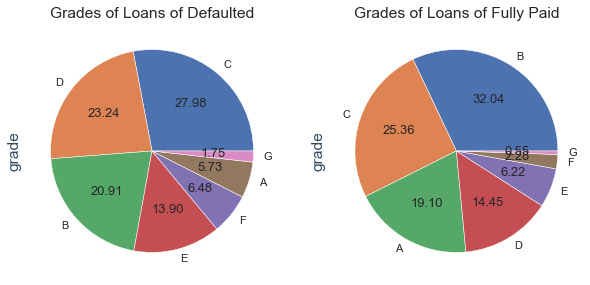

In [74]:
plt.subplots(1,2)

plt.subplot(121)
df_default['grade'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Grades of Loans of Defaulted')

plt.subplot(122)
df_fullypaid['grade'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Grades of Loans of Fully Paid')

#Majority of the grades of defaulted loans are D,C & B

Text(0.5, 1.0, 'Term Length of Loans of Fully Paid')

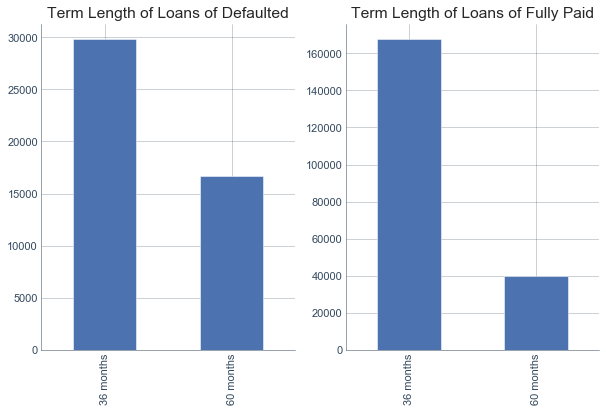

In [ ]:
plt.subplots(1,2)

plt.subplot(121)
df_default['term'].value_counts().plot(kind='bar')
plt.title('Term Length of Loans of Defaulted')

plt.subplot(122)
df_fullypaid['term'].value_counts().plot(kind='bar')
plt.title('Term Length of Loans of Fully Paid')

#the proportion for defaulted terms loans are higher for 36 months

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Home Ownership of Fully Paid')

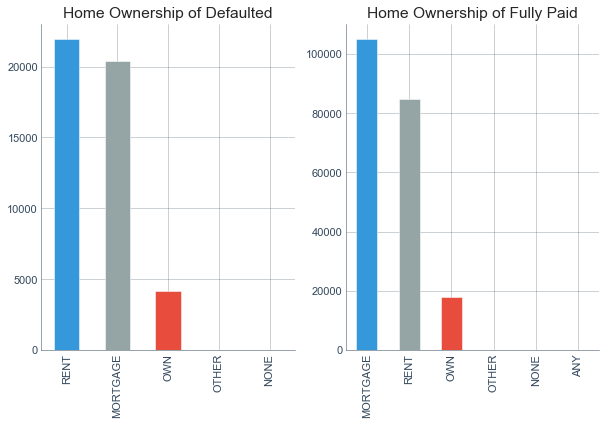

In [ ]:
plt.subplots(1,2)

plt.subplot(121)
df_default['home_ownership'].value_counts().plot(kind='bar',colors=flatui)
plt.title('Home Ownership of Defaulted')

plt.subplot(122)
df_fullypaid['home_ownership'].value_counts().plot(kind='bar',colors=flatui)
plt.title('Home Ownership of Fully Paid')

#very interesting, a major category of defaulted home owners are renters- most likely can't afford a mortgage on top of it as well

Text(0, 0.5, 'Frequency')

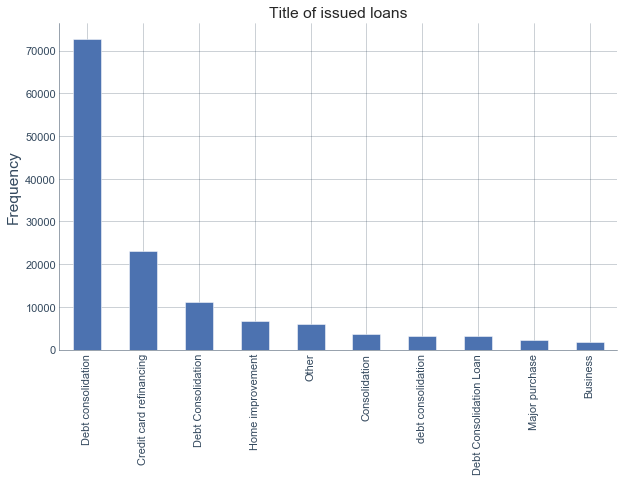

In [ ]:
df['title'].value_counts().head(10).plot(kind="bar")
plt.title('Title of issued loans')
plt.ylabel('Frequency')

In [ ]:
len(df.title.unique())
df = df.drop('title',axis=1)

Text(0.5, 1.0, 'Distribution of Loan Amount Applied by Borrowers')

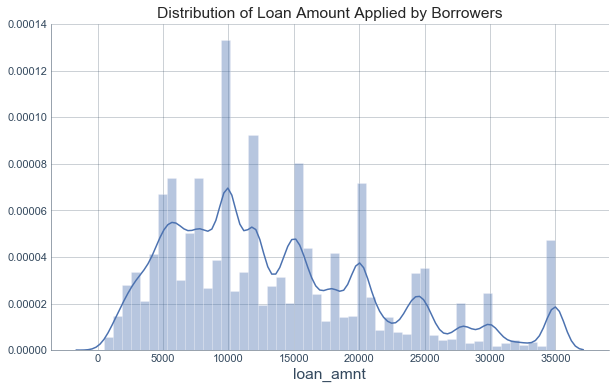

In [ ]:
sns.distplot(df['loan_amnt']).set_title('Distribution of Loan Amount Applied by Borrowers')

#distribution of loan amount applied by borrowers

Text(0.5, 1.0, 'Distribution of Interest Rate for the Borrowers')

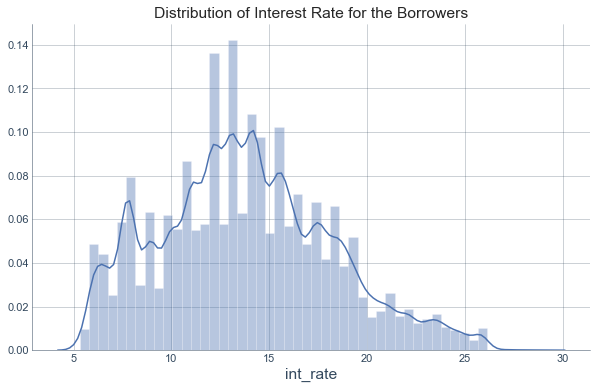

In [ ]:
y=df['int_rate']
sns.distplot(y).set_title('Distribution of Interest Rate for the Borrowers')

In [ ]:
df_default.describe() #interestingly higher mean of loan_amnt, higher interest rate, more accounts

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,4.646700e+04,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,4.646700e+04,46419.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46461.000000,46467.0,46467.000000,36430.000000,3.643000e+04,3.643000e+04
mean,14573.018486,14528.669271,14411.372330,16.019092,441.073219,6.512892e+04,18.444234,0.278757,0.980309,11.061721,0.146943,1.499084e+04,59.443002,24.229044,304.091257,6358.551737,6298.114431,3333.515304,2155.160268,2.440093,867.436067,91.206597,454.998240,0.008287,1.0,0.003938,133.869146,1.143495e+05,2.640412e+04
std,8391.928489,8366.116179,8390.706853,4.301283,246.793319,5.686452e+04,7.950591,0.799408,1.127832,4.934646,0.449553,1.741112e+04,23.479084,11.532493,2218.740041,5424.353661,5400.665726,3292.831378,2243.479601,10.067126,1559.671060,253.065131,650.022043,0.096183,0.0,0.070703,1300.614497,1.277547e+05,2.541921e+04
min,900.000000,900.000000,0.000000,5.420000,21.620000,4.080000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,13.050000,265.810000,4.000000e+04,12.610000,0.000000,0.000000,8.000000,0.000000,6.226500e+03,43.200000,16.000000,0.000000,2496.360000,2455.050000,1105.880000,686.065000,0.000000,0.000000,0.000000,237.850000,0.000000,1.0,0.000000,0.000000,2.568100e+04,1.240000e+04
50%,12700.000000,12600.000000,12400.000000,15.800000,391.170000,5.600000e+04,18.380000,0.000000,1.000000,10.000000,0.000000,1.134900e+04,61.600000,23.000000,0.000000,4855.880000,4792.810000,2324.110000,1434.080000,0.000000,16.250000,0.000000,375.880000,0.000000,1.0,0.000000,0.000000,5.958900e+04,2.050000e+04
75%,20000.000000,20000.000000,19975.000000,18.920000,573.320000,7.800000e+04,24.140000,0.000000,2.000000,14.000000,0.000000,1.921300e+04,78.000000,31.000000,0.000000,8606.465000,8530.180000,4455.390000,2778.530000,0.000000,1214.165000,24.915500,568.700000,0.000000,1.0,0.000000,0.000000,1.721805e+05,3.320000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,39.980000,18.000000,8.000000,76.000000,12.000000,1.746716e+06,129.400000,110.000000,35000.000000,46199.440000,46162.550000,34483.270000,20610.170000,358.680000,33520.270000,7002.190000,34833.350000,4.000000,1.0,5.000000,95806.000000,3.437283e+06,1.998700e+06


In [ ]:
df_fullypaid.describe() 

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,207723.000000,207723.000000,207723.000000,207723.000000,207723.000000,2.077230e+05,207723.000000,207723.000000,207723.000000,207723.000000,207723.000000,2.077230e+05,207571.000000,207723.000000,207723.0,207723.000000,207723.000000,207723.000000,207723.000000,207723.000000,207723.0,207723.0,207723.000000,207673.000000,207723.0,207723.000000,1.540340e+05,1.540340e+05,1.540340e+05
mean,13346.350910,13306.858172,13219.787151,13.274244,413.172899,7.416175e+04,16.139156,0.244219,0.823919,10.917944,0.143090,1.521041e+04,53.187323,25.218093,0.0,15186.680773,15081.305566,13283.934697,1902.410501,0.335583,0.0,0.0,7770.242299,0.006433,1.0,0.002941,2.198229e+02,1.437919e+05,3.047313e+04
std,8057.388288,8035.909683,8053.805339,4.268371,244.199337,5.908066e+04,7.696190,0.728877,1.050899,4.883557,0.434046,1.903250e+04,24.924804,11.789864,0.0,9446.055451,9456.822383,8037.754633,2022.816723,3.574886,0.0,0.0,7508.104201,0.087649,0.0,0.058101,2.338255e+04,1.570543e+05,3.033278e+04
min,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,7200.000000,7150.000000,7000.000000,10.160000,234.360000,4.500000e+04,10.420000,0.000000,0.000000,7.000000,0.000000,5.786000e+03,34.900000,17.000000,0.0,8056.396456,7931.415000,7075.000000,619.300000,0.000000,0.0,0.0,1555.190000,0.000000,1.0,0.000000,0.000000e+00,2.914625e+04,1.350000e+04
50%,12000.000000,12000.000000,11725.000000,13.110000,360.080000,6.416200e+04,15.750000,0.000000,0.000000,10.000000,0.000000,1.084800e+04,54.500000,24.000000,0.0,12963.170000,12868.260000,11999.970000,1284.800000,0.000000,0.0,0.0,5749.590000,0.000000,1.0,0.000000,0.000000e+00,8.777900e+04,2.270000e+04
75%,18000.000000,18000.000000,18000.000000,15.810000,540.560000,9.000000e+04,21.480000,0.000000,1.000000,13.000000,0.000000,1.904100e+04,72.800000,32.000000,0.0,20538.335773,20430.315000,18000.000000,2428.315000,0.000000,0.0,0.0,11663.590000,0.000000,1.0,0.000000,0.000000e+00,2.166898e+05,3.780000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1409.990000,7.141778e+06,57.140000,29.000000,8.000000,58.000000,15.000000,1.743266e+06,892.300000,150.000000,0.0,57777.579870,57777.580000,35000.030000,22777.580000,286.747566,0.0,0.0,36475.590000,6.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06


/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


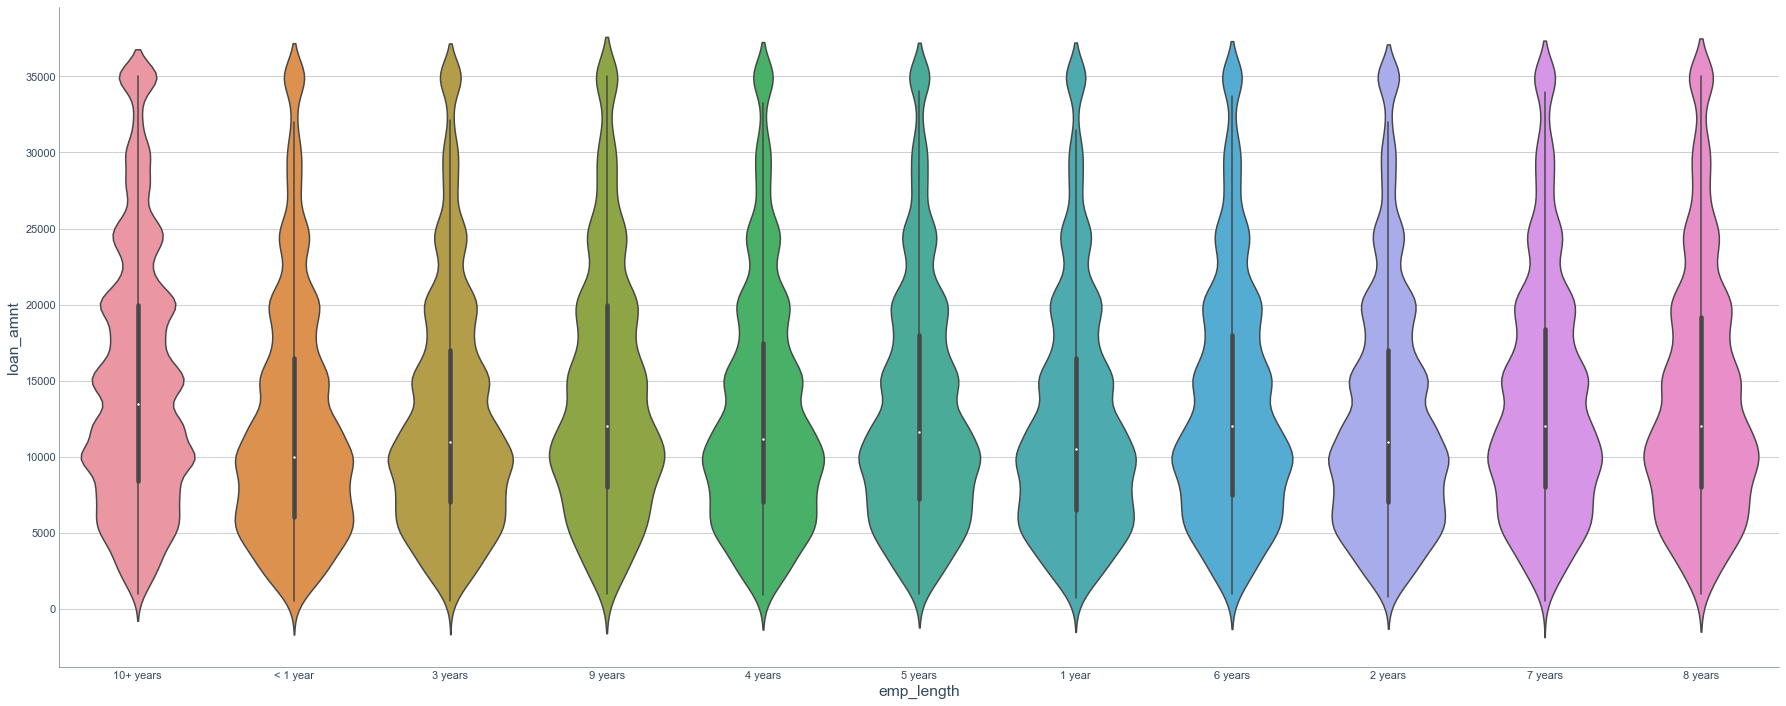

In [ ]:
sns.catplot(x="emp_length", y="loan_amnt",
            kind="violin", split=False, data=df, size=10, aspect=2.5)

#when years are low the tails are thin as it should be as they have worked less and have lower chance of paying back
#high loan amounts

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


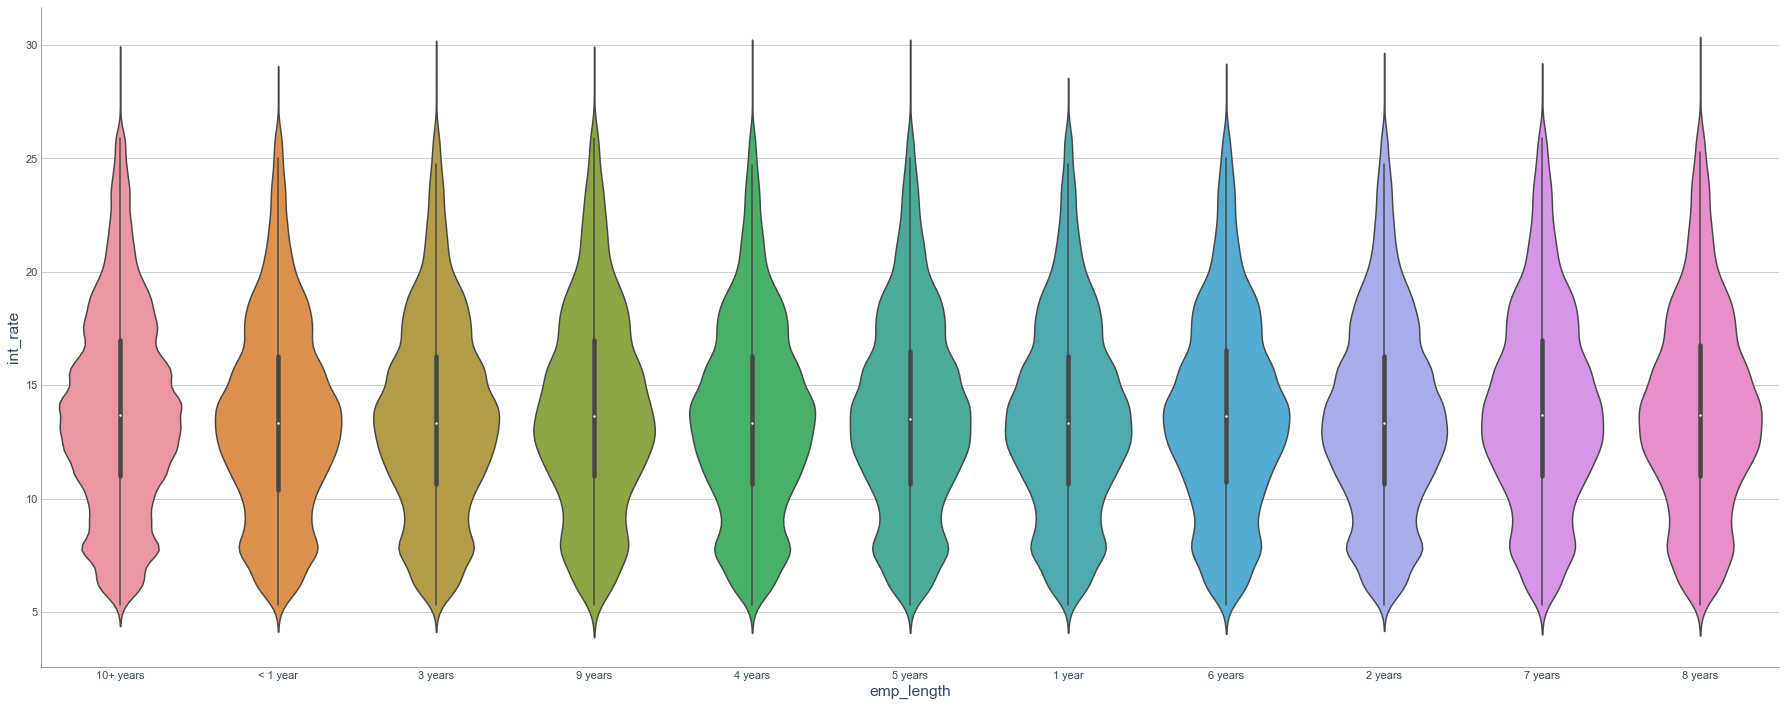

In [ ]:
sns.catplot(x="emp_length", y="int_rate",
            kind="violin", split=False, data=df, size=10, aspect=2.5);

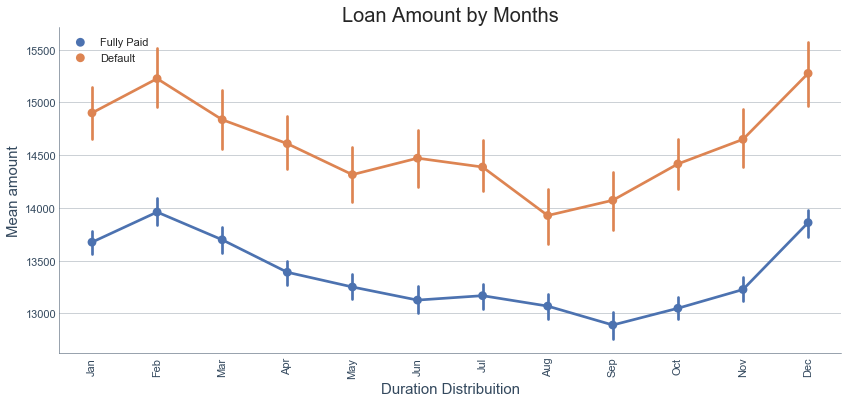

In [ ]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str

months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amnt', 
                  data=df, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

#again its interesting that lending increases after Sept, quite possible because of holiday/shopping season
#and that end of year is approaching-maybe people are consolding their debts going into the new year
#months of the year could be a feature to utilize

In [ ]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='best')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

In [ ]:
fig = plt.figure(figsize=(18,10))
df[df['loan_status']=='Default'].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);



In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(df_default['int_rate'],df_default['annual_inc'],alpha = 1)
plt.scatter(df_fullypaid['int_rate'],df_fullypaid['annual_inc'],alpha = 0.05, color='red')
plt.ylim(0,20000)
plt.xlabel('Interest Rate')
plt.ylabel('Annual Income')
plt.title('Interest Rate/ Annual Income (20K)')

#ignore

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(df_default['int_rate'],df_default['annual_inc'],alpha = 1)
#plt.ylim(0,20000)
plt.xlabel('Interest Rate')
plt.ylabel('Annual Income')
plt.title('Interest Rate/ Annual Income')

#1 outliers

## Statistics

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)


#remove funded_amnt, funded_amnt_inv, total_pymnt,installement, total_pymnt, total_pymnt_inv,

In [ ]:
highly_corr_columns=['funded_amnt', 'funded_amnt_inv','installment','policy_code','total_pymnt_inv','collection_recovery_fee','total_rev_hi_lim','out_prncp_inv','total_rec_prncp','total_pymnt','issue_d']
df = df.drop(highly_corr_columns, axis = 1)
df

#got rid of highly correlated features with a threshold of +/-0.8 or higher 

In [ ]:
sns.catplot(x="term", y="loan_amnt", kind="box", data=df_default)


In [ ]:
sns.catplot(x="int_rate", y="grade", kind="box", data=df_default)

In [ ]:
sns.catplot(x="loan_amnt", y="grade", kind="box", data=df_default)

In [ ]:
sns.catplot(x="loan_amnt", y="addr_state", kind="box", data=df_default, size=35, aspect=1)